In [1]:
# do eda for donations.csv, essays.csv, outcomes.csv, projects.csv, resources.csv, sampleSubmission.csv by showing their columns and datatypes

import pandas as pd

# Load the datasets from Datasets folder
donations = pd.read_csv('Datasets/donations.csv')
# essays = pd.read_csv('Datasets/essays.csv')s
outcomes = pd.read_csv('Datasets/outcomes.csv')
projects = pd.read_csv('Datasets/projects.csv')
resources = pd.read_csv('Datasets/resources.csv')
sample_submission = pd.read_csv('Datasets/sampleSubmission.csv')

In [2]:
# Function to display the columns as a list
def display_columns(df, name):
    print(f"\n{name} Columns:")
    print(list(df.columns))

# Display columns and datatypes for each dataset
display_columns(donations, 'Donations')
# display_columns(essays, 'Essays')
display_columns(outcomes, 'Outcomes')
display_columns(projects, 'Projects')
display_columns(resources, 'Resources')
display_columns(sample_submission, 'Sample Submission')


Donations Columns:
['donationid', 'projectid', 'donor_acctid', 'donor_city', 'donor_state', 'donor_zip', 'is_teacher_acct', 'donation_timestamp', 'donation_to_project', 'donation_optional_support', 'donation_total', 'dollar_amount', 'donation_included_optional_support', 'payment_method', 'payment_included_acct_credit', 'payment_included_campaign_gift_card', 'payment_included_web_purchased_gift_card', 'payment_was_promo_matched', 'via_giving_page', 'for_honoree', 'donation_message']

Outcomes Columns:
['projectid', 'is_exciting', 'at_least_1_teacher_referred_donor', 'fully_funded', 'at_least_1_green_donation', 'great_chat', 'three_or_more_non_teacher_referred_donors', 'one_non_teacher_referred_donor_giving_100_plus', 'donation_from_thoughtful_donor', 'great_messages_proportion', 'teacher_referred_count', 'non_teacher_referred_count']

Projects Columns:
['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid', 'school_latitude', 'school_longitude', 'school_city', 'school_state', 'sch

In [3]:
# Important: You should do data exploration and provide descriptive stats to show that you have enough relevant data to solve this problem
# For example, you can use the describe method to get descriptive statistics

def display_descriptive_stats(df, name):
    print(f"\n{name} Descriptive Statistics:")
    print(df.describe(include='all'))  # include='all' to get stats for all columns, including non-numeric
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())

# Display descriptive statistics for each dataset
display_descriptive_stats(sample_submission, 'Sample Submission')
display_descriptive_stats(donations, 'Donations')
# display_descriptive_stats(essays, 'Essays')
display_descriptive_stats(outcomes, 'Outcomes')
display_descriptive_stats(projects, 'Projects')
display_descriptive_stats(resources, 'Resources')


Sample Submission Descriptive Statistics:
                               projectid  is_exciting
count                              44772      44772.0
unique                             44772          NaN
top     ffff7266778f71242675416e600b94e1          NaN
freq                                   1          NaN
mean                                 NaN          0.0
std                                  NaN          0.0
min                                  NaN          0.0
25%                                  NaN          0.0
50%                                  NaN          0.0
75%                                  NaN          0.0
max                                  NaN          0.0

Data Types:
projectid      object
is_exciting     int64
dtype: object

Missing Values:
projectid      0
is_exciting    0
dtype: int64

Donations Descriptive Statistics:
                              donationid                         projectid  \
count                            3097989                     

In [4]:
#Descriptive Statistics:

# Distribution of fully funded vs. unfunded projects.

# Average and median donation amounts per project.

# Project characteristics (cost, subject area, school poverty level) and their relationship to funding success.

In [5]:
# Distribution of fully funded vs. unfunded projects.

# Find the most common project subject areas and their funding success rates using 'fully_funded' from outcomes.csv and 'primary_focus_subject' from projects.csv

# TODO

# print(projects['primary_focus_subject'].unique())

# group by primary_focus_subject, then show how many fully funded projects there are

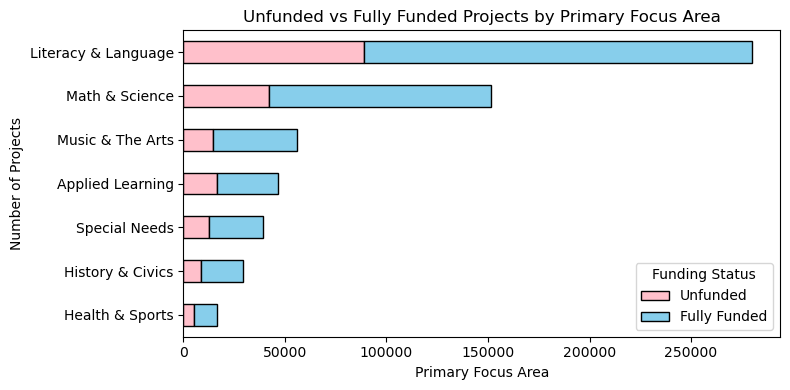

In [35]:
# Merge the datasets
merged_data = pd.merge(projects, outcomes, on='projectid', how='left')

# Group by primary_focus_area and fully_funded using the merged data
funding_status = merged_data.groupby(['primary_focus_area', 'fully_funded'])['projectid'].count().unstack()
funding_status['Temp'] = funding_status.sum(axis=1)
funding_status = funding_status.sort_values(by='Temp', ascending=True)
funding_status = funding_status.drop(columns='Temp')  # Drop the temporary total column

# Plot the data as a stacked bar chart
funding_status.plot(
    kind='barh',
    stacked=True,
    figsize=(8, 4),
    color=['pink', 'skyblue'],
    edgecolor='black'
    )

# Add labels and title
plt.xlabel('Primary Focus Area')
plt.ylabel('Number of Projects')
plt.title('Unfunded vs Fully Funded Projects by Primary Focus Area')
plt.legend(title='Funding Status', labels=['Unfunded', 'Fully Funded'])
plt.tight_layout()

# Show the plot
plt.show()


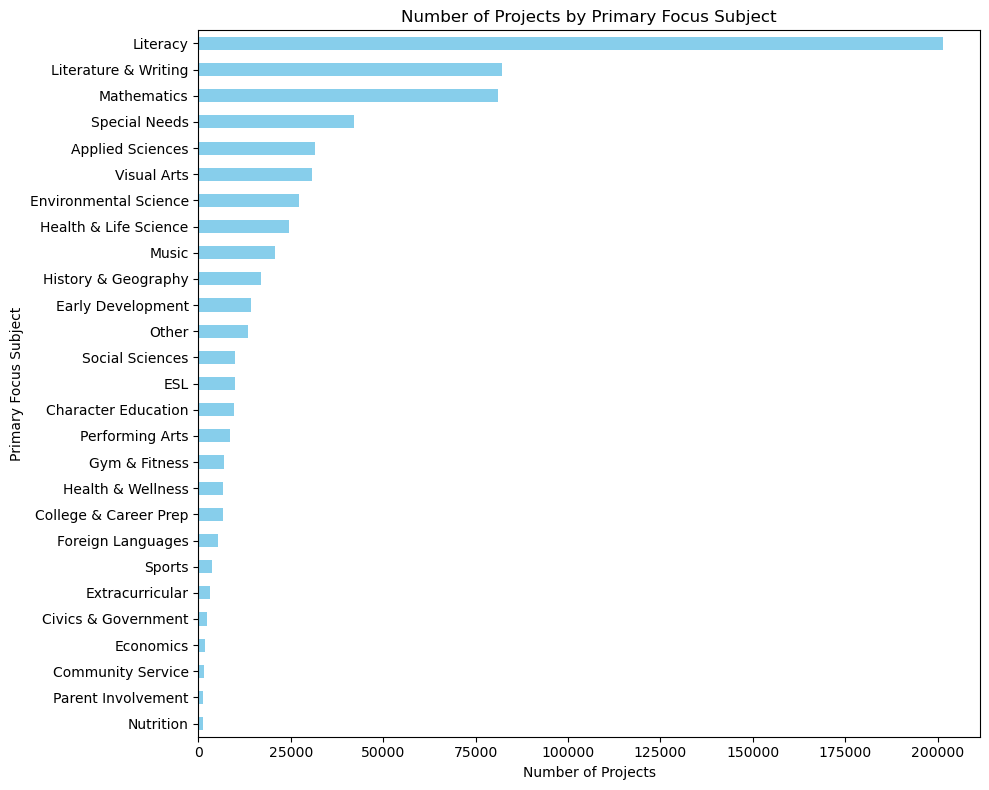

In [10]:
import matplotlib.pyplot as plt

count_by_subject = projects.groupby('primary_focus_subject')['projectid'].count()
count_by_subject.sort_values(ascending=False)

# Plot the count_by_subject as a horizontal bar chart
count_by_subject.sort_values(ascending=True).plot(kind='barh', figsize=(10, 8), color='skyblue')

# Add labels and title
plt.xlabel('Number of Projects')
plt.ylabel('Primary Focus Subject')
plt.title('Number of Projects by Primary Focus Subject')

# Show the plot
plt.tight_layout()
plt.show()

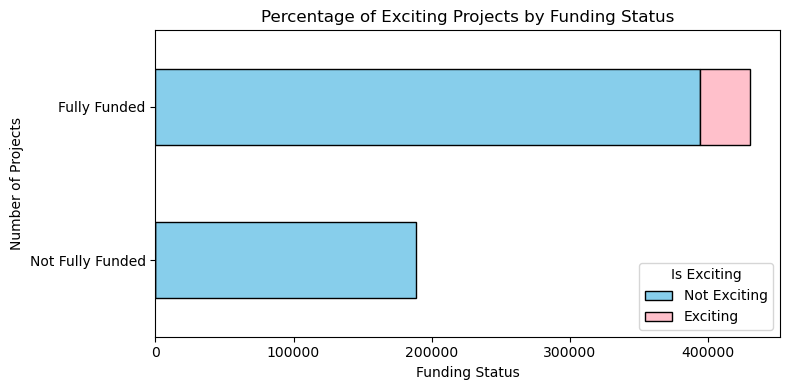

In [36]:
import matplotlib.pyplot as plt

# Filter data for fully funded and not fully funded projects
fully_funded_exciting = outcomes[outcomes['fully_funded'] == 't']['is_exciting'].value_counts()
not_fully_funded_exciting = outcomes[outcomes['fully_funded'] == 'f']['is_exciting'].value_counts()

# Combine the data into a DataFrame for easier plotting
exciting_data = pd.DataFrame({
    'Fully Funded': fully_funded_exciting,
    'Not Fully Funded': not_fully_funded_exciting
}).T

exciting_data['Total'] = exciting_data.sum(axis=1)
exciting_data = exciting_data.sort_values(by='Total').drop(columns='Total')

# Plot the data
exciting_data.plot(
    kind='barh',
    figsize=(8, 4),
    color=['skyblue', 'pink'],
    stacked=True,
    edgecolor='black'
    )
plt.title('Percentage of Exciting Projects by Funding Status')
plt.xlabel('Funding Status')
plt.ylabel('Number of Projects')
plt.xticks(rotation=0)
plt.legend(title='Is Exciting', labels=['Not Exciting', 'Exciting'])
plt.tight_layout()
plt.show()


In [8]:
# from outcomes.csv, show the percentage of projects that are exciting and not exciting
# Calculate the percentage of projects that are exciting and not exciting
exciting_percentage = outcomes['is_exciting'].value_counts(normalize=True) * 100

# Display the results
print("Percentage of Projects:")
print(exciting_percentage)


Percentage of Projects:
is_exciting
f    94.072589
t     5.927411
Name: proportion, dtype: float64


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date_posted' column to datetime format
projects['date_posted'] = pd.to_datetime(projects['date_posted'])

# Extract the year from the 'date_posted' column
projects['year_posted'] = projects['date_posted'].dt.year

# Merge with outcomes to include funding status (assuming outcomes data is merged earlier)
merged_data = pd.merge(projects, outcomes, on='projectid', how='left')

# Group by year_posted and funding status (fully funded vs not fully funded)
funding_per_year = merged_data.groupby(['year_posted', 'fully_funded']).size().unstack()

# Fill missing values with 0 for years without data
funding_per_year = funding_per_year.fillna(0)

# Ensure all years are included, even those without funding info (like 2014)
all_years = range(projects_

SyntaxError: incomplete input (713777638.py, line 20)

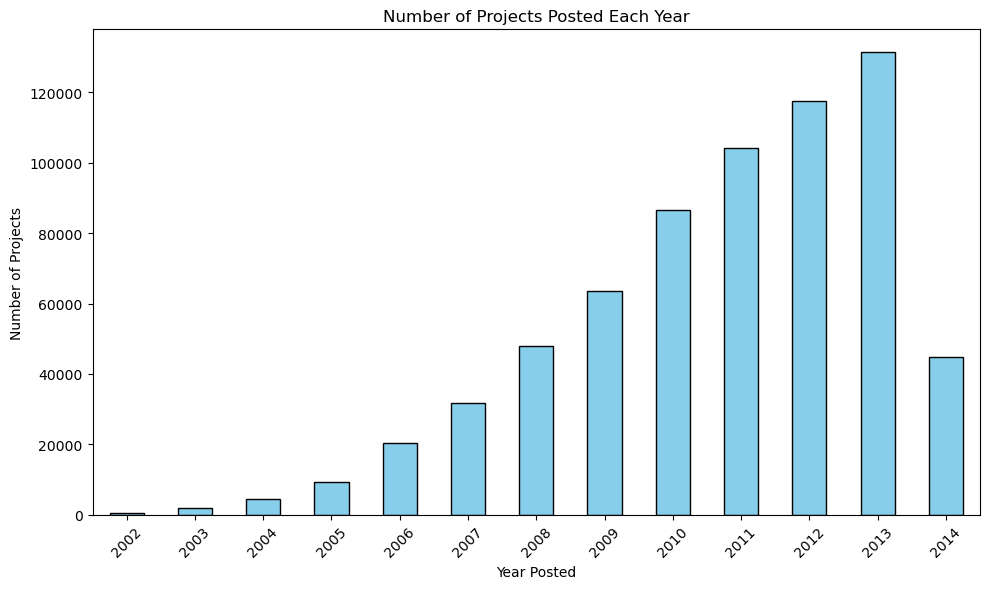

In [ ]:
# time series analysis
# Convert the 'date_posted' column to datetime format
projects['date_posted'] = pd.to_datetime(projects['date_posted'])
# Extract the year from the 'date_posted' column
projects['year_posted'] = projects['date_posted'].dt.year
# Count the number of projects posted each year 
projects_per_year = projects['year_posted'].value_counts().sort_index()
# Plot the data
projects_per_year.plot(
    kind='bar',
    figsize=(10, 6),
    color='skyblue',
    edgecolor='black'
    )
# Add labels and title
plt.xlabel('Year Posted')
plt.ylabel('Number of Projects')
plt.title('Number of Projects Posted Each Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




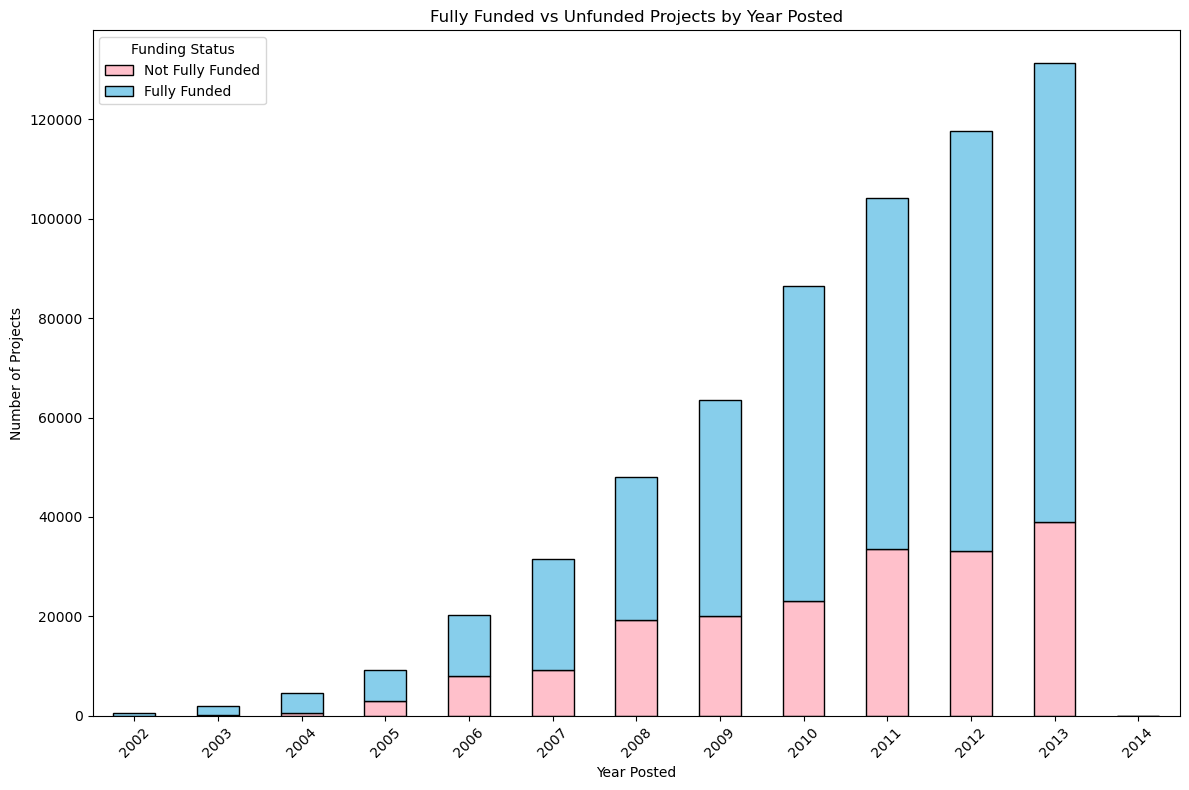

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date_posted' column to datetime format
projects['date_posted'] = pd.to_datetime(projects['date_posted'])

# Extract the year from the 'date_posted' column
projects['year_posted'] = projects['date_posted'].dt.year

# Merge with outcomes to include funding status (assuming outcomes data is merged earlier)
merged_data = pd.merge(projects, outcomes, on='projectid', how='left')

# Group by year_posted and funding status (fully funded vs not fully funded)
funding_per_year = merged_data.groupby(['year_posted', 'fully_funded']).size().unstack(fill_value=0)

# Ensure all years from the 'projects' dataset are included, even if missing in 'outcomes'
all_years = range(projects['year_posted'].min(), projects['year_posted'].max() + 1)
funding_per_year = funding_per_year.reindex(all_years, fill_value=0)

# Plot the data as a stacked bar chart
funding_per_year.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=['pink', 'skyblue'],
    edgecolor='black'
)

# Add labels and title
plt.xlabel('Year Posted')
plt.ylabel('Number of Projects')
plt.title('Fully Funded vs Unfunded Projects by Year Posted')
plt.xticks(rotation=45)
plt.legend(title='Funding Status', labels=['Not Fully Funded', 'Fully Funded'])
plt.tight_layout()

# Show the plot
plt.show()


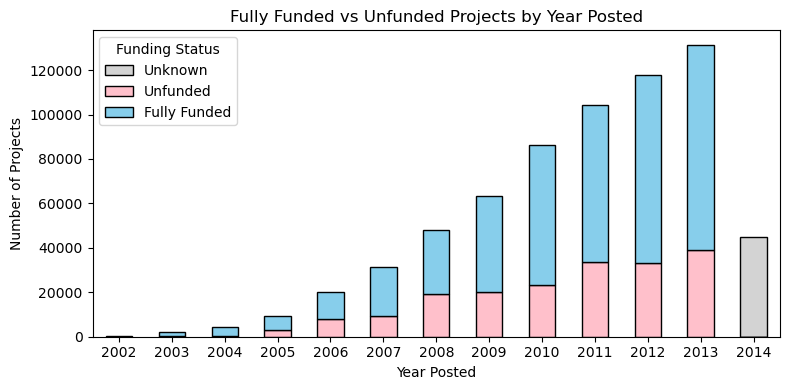

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date_posted' column to datetime format
projects['date_posted'] = pd.to_datetime(projects['date_posted'])

# Extract the year from the 'date_posted' column
projects['year_posted'] = projects['date_posted'].dt.year

# Perform a full outer join (merge) between projects and outcomes to ensure all years from projects are included
merged_data = pd.merge(projects, outcomes, on='projectid', how='outer')

# Add a value for NA values in the 'fully_funded' column
merged_data['fully_funded'] = merged_data['fully_funded'].fillna('Unknown')

# Group by year_posted and funding status (fully funded vs not fully funded)
funding_per_year = merged_data.groupby(['year_posted', 'fully_funded']).size().unstack(fill_value=0)

# Ensure all years from the 'projects' dataset are included, even if missing in 'outcomes'
all_years = range(projects['year_posted'].min(), projects['year_posted'].max() + 1)
funding_per_year = funding_per_year.reindex(all_years, fill_value=0)

# Plot the data as a stacked bar chart
funding_per_year.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    color=['lightgray','pink', 'skyblue'],
    edgecolor='black'
)

# Add labels and title
plt.xlabel('Year Posted')
plt.ylabel('Number of Projects')
plt.title('Fully Funded vs Unfunded Projects by Year Posted')
plt.xticks(rotation=0)
plt.legend(title='Funding Status', labels=['Unknown','Unfunded', 'Fully Funded'])
plt.tight_layout()

# Show the plot
plt.show()
